**Hotel Booking Dataset**




This dataset contains booking data for two types of hotels, includes data such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, and more.

[dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

We didn't do any transformations to the data so the dataset remains the same. Explanations for each column is provided in the link for the dataset.

***Binary Variables:***
  1. hotel - there are two types of hotel (Resort Hotel or City Hotel)

***Discrete Categorical:***
1.  arrival_date_year - which year the booking is for (2015, 2016, 2017), variable is ordinal.
***Numerical variables:***
  1. lead_time - delta time between booking and arrival to hotel
  2. adr - #lodging transactions / #nights stayed
  
  We sample randomly (using a seed 42) 5000 rows from the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
hotel_data = pd.read_csv('hotel_bookings.csv').sample(n=5000, random_state=42)
hotel_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0000,NaN,0,Transient,66.8000,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0000,NaN,0,Transient,76.5000,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0000,NaN,0,Transient-Party,60.0000,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0000,NaN,0,Transient-Party,95.0000,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0000,NaN,0,Transient,108.0000,0,0,Check-Out,2017-04-20


# **Part A**

## Section 1
***Research question:***
1. The influence of lead_time, hotel and year of arrival variables have on the variable adr

## Section 2




In [ ]:
hotel_sample_200 = hotel_data.sample(n=200, random_state=50)

In [ ]:
numerical_vars = ["lead_time", "adr"]
vars_hist = ["hotel", "arrival_date_year"]

## Section 3.a

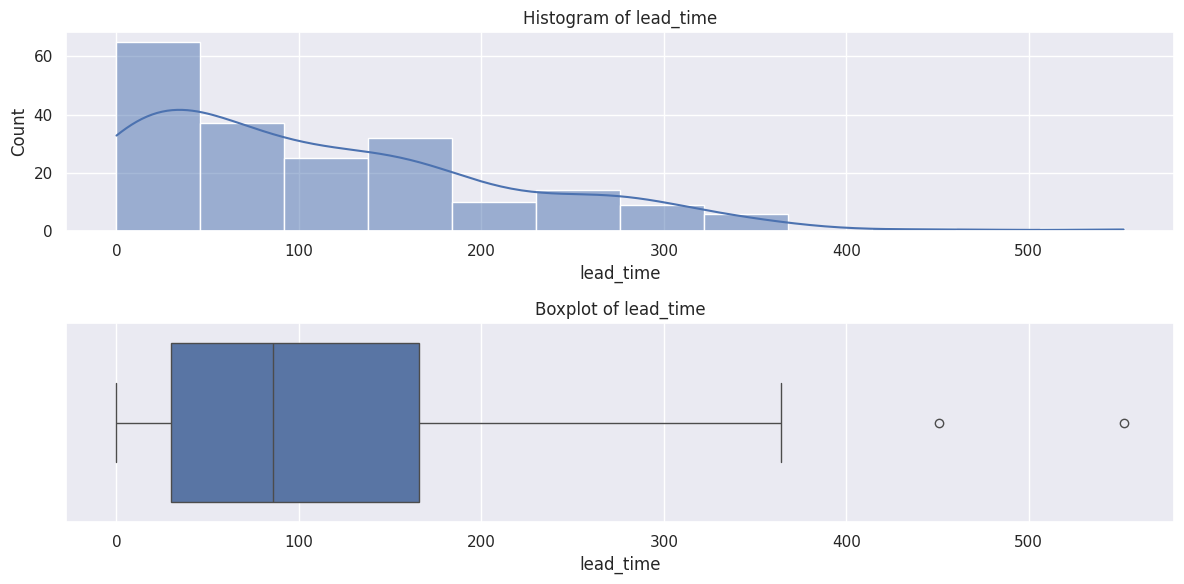

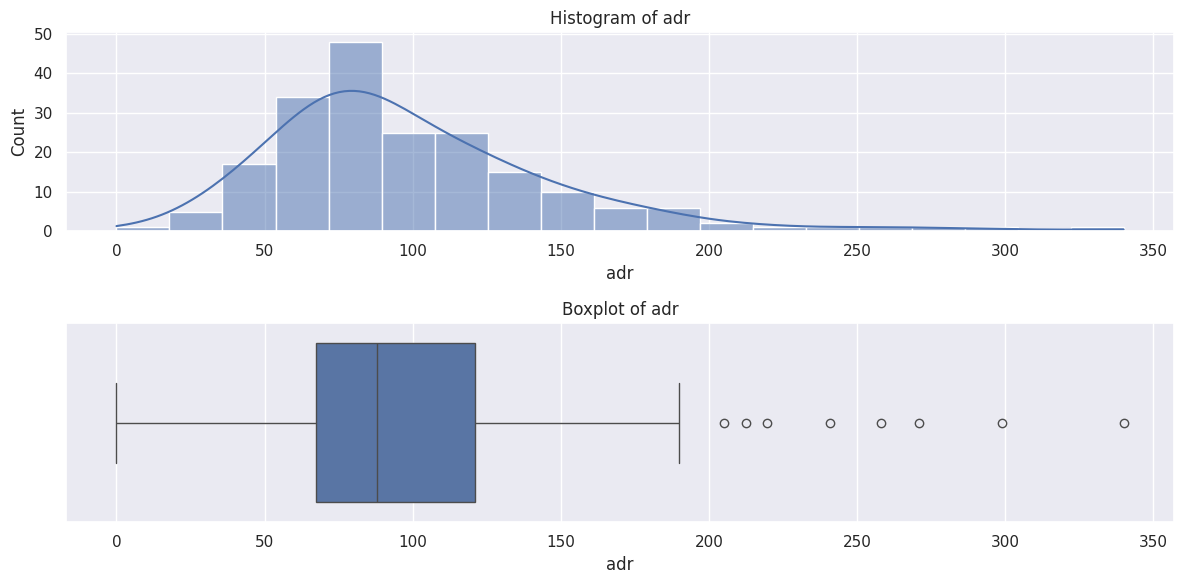

In [ ]:
for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    sns.histplot(hotel_sample_200[var], kde=True)
    plt.title(f"Histogram of {var}")
    plt.subplot(2, 1, 2)
    sns.boxplot(x=hotel_sample_200[var])
    plt.title(f"Boxplot of {var}")

    plt.tight_layout()
    plt.show()

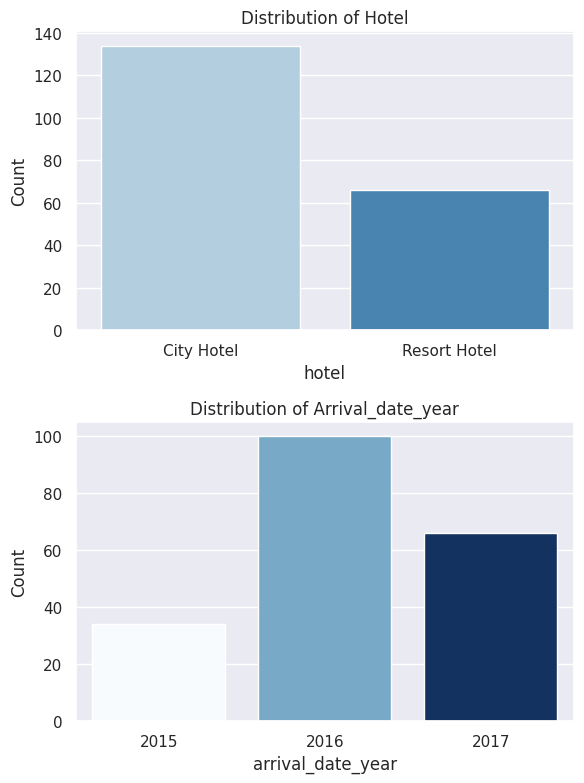

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=len(vars_hist), ncols=1, figsize=(6, 4 * len(vars_hist)))
for i, var in enumerate(vars_hist):
    sns.countplot(x=var, data=hotel_sample_200, hue=var, palette='Blues', legend=False, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {var.capitalize()}')

plt.tight_layout()
plt.show()

## Section 3.b

We can see that we don't have any missing data in these columns

In [ ]:
for var in list(numerical_vars + vars_hist):
    print(f"{var} has {hotel_sample_200[var].isna().sum()} null values")

lead_time has 0 null values
adr has 0 null values
hotel has 0 null values
arrival_date_year has 0 null values


Let's look at ***outliers:***

Firstly we won't look at the binary/categorical variables since there are only few options therefore symmetry/distribution isn't meaningful here.

for the variable adr, we can see that around the value 75 we get an abnormal amount of ppl who pay a higher adr at that value relative to the given distribution of the graph.

In [ ]:
for var in list(numerical_vars):
    Q1 = hotel_sample_200[var].quantile(0.25)
    Q3 = hotel_sample_200[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = hotel_sample_200[(hotel_sample_200[var] < lower_bound) | (hotel_sample_200[var] > upper_bound)]
    print(f"\n#Outliars for variable {var} is {len(outliers[var])}\n")
    print(f"first 1-2 outliars of variable {var} where (index, value):\n{outliers[var].head(2)}")



#Outliars for variable lead_time is 2

first 1-2 outliars of variable lead_time where (index, value):
62384    552
51223    451
Name: lead_time, dtype: int64

#Outliars for variable adr is 8

first 1-2 outliars of variable adr where (index, value):
13774   212.5000
7520    299.0000
Name: adr, dtype: float64


### Symmetry & Distribution of variable distributions:


adr: Looking at the graph, we can see that the right tail is much longer than the left. In the boxplot the median isn't right in the middle, and whiskers aren't symmetrical. Therefore, we will conclude from the visualization of the data that the distribution isn't symmetrical.

furthermore, looking at the Q-Q plot we can see that the dots of data don't quite follow the red line, concluding that the distribution isn't symmetric.


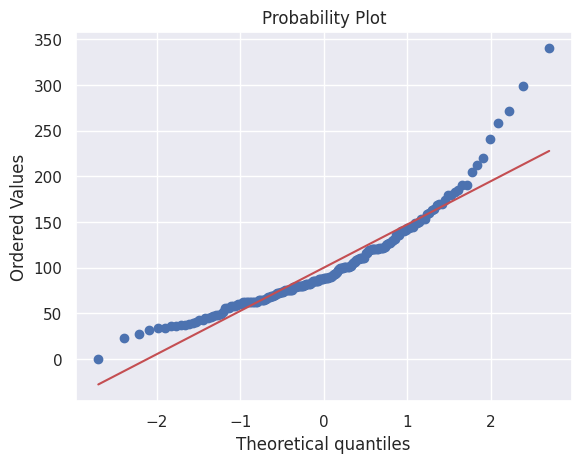

In [ ]:
# Q-Q plot
stats.probplot(hotel_sample_200["adr"], dist="norm", plot=plt)
plt.show()


Distribution for variable "adr", the data for this variable does look like it distributes **Log Normal**

Here is some code that shows the log graph for the variable and also perform a KS statistical test that with a 95% confidence that it's distributed log normal

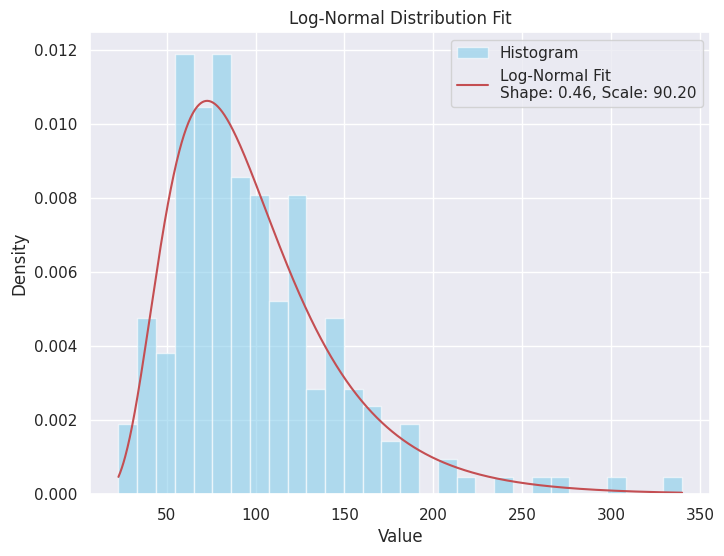

In [ ]:
data = hotel_sample_200["adr"]

data = data.dropna()
data = data[data > 0]
shape, loc, scale = stats.lognorm.fit(data, floc=0)
x = np.linspace(min(data), max(data), 1000)
pdf = stats.lognorm.pdf(x, shape, loc, scale)

plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
plt.plot(x, pdf, 'r-', label=f'Log-Normal Fit\nShape: {shape:.2f}, Scale: {scale:.2f}')
plt.title('Log-Normal Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
shape, loc, scale = stats.lognorm.fit(data, floc=0)

# KS test
# Generate the theoretical CDF of the fitted log-normal distribution
ks_statistic, p_value = stats.kstest(data, 'lognorm', args=(shape, loc, scale))

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

if p_value > 0.05:
    print("Fail to reject the null hypothesis: The data likely follows a log-normal distribution.")
else:
    print("Reject the null hypothesis: The data does not follow a log-normal distribution.")


KS Statistic: 0.0484490290857689
P-Value: 0.7197880226983461
Fail to reject the null hypothesis: The data likely follows a log-normal distribution.


**Lead_time** distribution **isn't symmetrical**, we can see that it's a sort of strong tail distribution which is not symmetrical. Further, we one column with a lot more values than all the others. Thus concluding that the distribution for lead_time is not symmetrical.

Given the graph we can see that the variable distributes with a **Strong tail**. Below we perform a hill estimator test with half the data (100 data points), and estimate α which we get is α < 2 =>  the data for lead_time distributes with a strong tail.

In [ ]:
def hill_estimator(data, k):
    data_sorted = np.sort(data)[::-1]  # Sort in descending order
    n = len(data)
    tail_data = data_sorted[:k]  # Take the top-k largest values
    hill = (1 / k) * np.sum(np.log(tail_data / tail_data[-1]))
    alpha = 1 / hill
    return alpha
data = hotel_sample_200["lead_time"]
k = int(data.shape[0] / 2)
alpha = hill_estimator(data, k)
print(f"Hill Estimator Tail Index (alpha): {alpha}")

if alpha < 2:
    print("The data is heavy-tailed.")
else:
    print("The data is not heavy-tailed.")


Hill Estimator Tail Index (alpha): 1.404632924849592
The data is heavy-tailed.


### 3.c

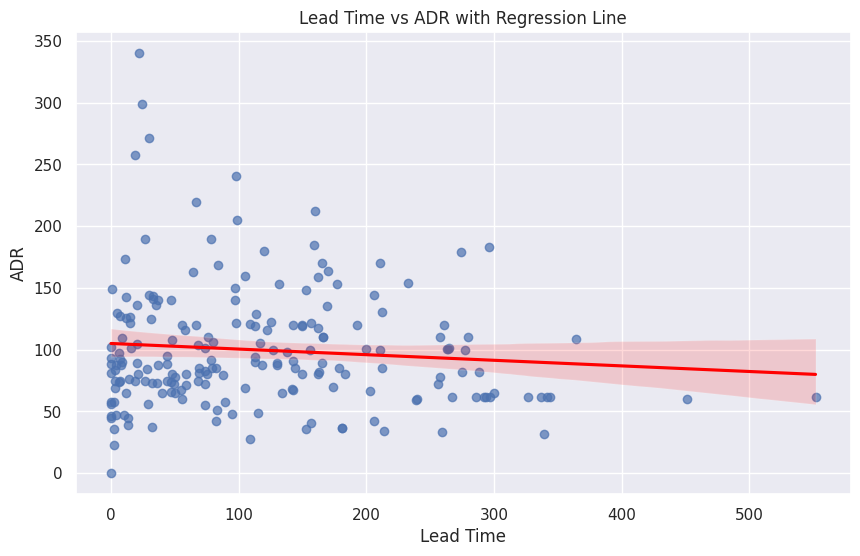

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='lead_time', y='adr', data=hotel_sample_200, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.title('Lead Time vs ADR with Regression Line')
plt.show()


In [ ]:
correlation = hotel_sample_200['lead_time'].corr(hotel_sample_200['adr'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: -0.09330253963982918


Looking at the graph and correlation, we can see that there is a slight negative correlation between the two variables. Meaning a weak negative relationship. Where the relationship is distictive.

since we only are using one numerical variable from X therefore lead_time has the most influence on adr (Y).

## 3.d

Discrete/Binary variables X as a function of Y histograms:

we can see that for each discrete/binary category we get adr is distributes normally.

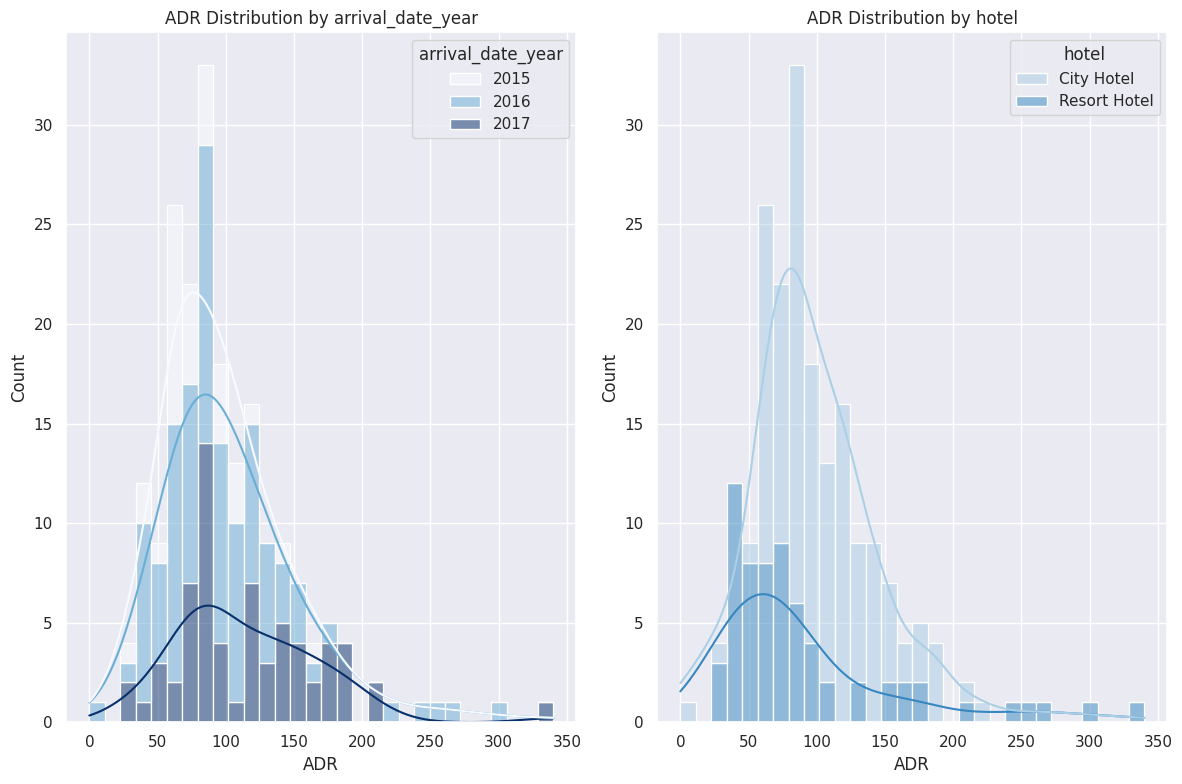

In [ ]:
discrete_vars = ['arrival_date_year', 'hotel']

sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
for i, var in enumerate(discrete_vars, 1):
    plt.subplot(1, len(discrete_vars), i)
    sns.histplot(data=hotel_sample_200, x='adr', hue=var, kde=True, multiple="stack", palette='Blues', bins=30)
    plt.title(f'ADR Distribution by {var}')
    plt.xlabel('ADR')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Section 4:

In [ ]:
hotel_encoder = LabelEncoder()
hotel_sample_200['hotel_encoded'] = \
          hotel_encoder.fit_transform(hotel_sample_200['hotel'])
hotel_data['hotel_encoded'] = \
          hotel_encoder.fit_transform(hotel_data['hotel'])
year_encoder = LabelEncoder()
hotel_sample_200['arrival_date_year_encoded'] = \
          year_encoder.fit_transform(hotel_sample_200['arrival_date_year'])
hotel_data['arrival_date_year_encoded'] = \
          year_encoder.fit_transform(hotel_data['arrival_date_year'])

X = pd.concat([
    hotel_sample_200['lead_time'],
    hotel_sample_200['hotel_encoded'],
    hotel_sample_200['arrival_date_year_encoded']
], axis=1)
X_cols = X.columns
X_orig = pd.concat([
    hotel_data['lead_time'],
    hotel_data['hotel_encoded'],
    hotel_data['arrival_date_year_encoded']
], axis=1)

x = np.array(np.hstack([np.ones((X.shape[0], 1)), X]))
x_orig = np.array(np.hstack([np.ones((X_orig.shape[0], 1)), X_orig]))
C = np.linalg.inv(x.T @ x) # since matrix is invertible
C_orig = np.linalg.inv(x_orig.T @ x_orig)


In [ ]:
Y = hotel_sample_200['adr']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
residuals = Y_test - Y_pred
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")


Model Performance:
Mean Squared Error: 2216.31
R-squared: 0.05

Model Coefficients:
                           Coefficient
lead_time                      -0.0487
hotel_encoded                 -13.9205
arrival_date_year_encoded      14.3292

Intercept: 92.48


In [ ]:
n = len(Y_test)  # Number of observations
k = X_train.shape[1] + 1  # Number of parameters (features + intercept)
sse = np.sum(residuals ** 2)  # Sum of squared errors
sigma2 = sse / n
log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma2) + 1)

model_aic = 2 * k - 2 * log_likelihood
model_bic = k * np.log(n) - 2 * log_likelihood

### ***Coefficient Interpretation***

**lead_time (-0.0487):**

The coefficient for lead_time is -0.0487, which indicates that for each additional day in lead time (the number of days between booking and arrival), the Average Daily Rate (ADR) decreases by $0.0487. This suggests that bookings made further in advance are associated with slightly lower room rates, likely reflecting discounts or promotions offered for early bookings.

**hotel_encoded (-13.9205):**

The coefficient for the binary variable hotel_encoded (0 for City Hotel, 1 for Resort Hotel) is -13.9205. This means that, on average, Resort Hotels charge $13.92 less per day than City Hotels, holding all other variables constant. This indicates a notable difference in pricing between the two types of hotels.

**arrival_date_year_encoded (14.3292):**

The coefficient for arrival_date_year_encoded is 14.3292, which means that, as the encoded year increases by one unit, the ADR increases by $14.33. This reflects an upward trend in room rates over time, possibly due to inflation or increased demand. The encoding likely corresponds to sequential years, with a higher encoded value representing a more recent year.

**Intercept (92.48):**
The intercept represents the baseline ADR of $92.48 when:

*lead_time* is 0 (same-day booking),
the hotel is a City Hotel (hotel_encoded = 0),
and the base year (arrival_date_year_encoded = 0) is used.
Under these conditions, the ADR is estimated to be $92.48.

## Section 5

In [ ]:
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
n = len(X)
p = X.shape[1]
df_reg = p
df_res = n - p - 1
df_total = n - 1

y_mean = np.mean(Y)
ss_total = np.sum((Y - y_mean) ** 2)
ss_res = np.sum((Y_test - Y_pred) ** 2)
ss_reg = ss_total - ss_res

ms_reg = ss_reg / df_reg
ms_res = ss_res / df_res

f_stat = ms_reg / ms_res
p_value = 1 - stats.f.cdf(f_stat, df_reg, df_res)

r2 = r2_score(Y_test, Y_pred)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
p_value_formatted = f"p_value < 0.001" if p_value < 0.001 else '{:.4f}'.format(p_value)
p_value_formatted2 = f"<0.001" if p_value < 0.001 else '{:.4f}'.format(p_value)

anova_table = pd.DataFrame({
    'Sum of Squares': [ss_reg, ss_res, ss_total],
    'df': [df_reg, df_res, df_total],
    'Mean Square': [ms_reg, ms_res, np.nan],
    'F-value': [f_stat, np.nan, np.nan],
    'p-value': [p_value_formatted2, np.nan, np.nan]
}, index=['Regression', 'Residual', 'Total'])



print("\n" + "="*80)
print("ANOVA TABLE".center(80))
print("="*80)
print(anova_table.round(4))
print("-"*80)

print("\nMODEL SUMMARY")
print("-"*80)
print(f"R²          : {r2:.4f}")
print(f"Adjusted R² : {r2_adj:.4f}")
print(f"F-statistic : {f_stat:.4f}")
print(f"p-value     : {p_value_formatted}")
print("="*80)


                                  ANOVA TABLE                                   
            Sum of Squares   df  Mean Square  F-value p-value
Regression     402252.2921    3  134084.0974 296.4442  <0.001
Residual        88652.3627  196     452.3080      NaN     NaN
Total          490904.6548  199          NaN      NaN     NaN
--------------------------------------------------------------------------------

MODEL SUMMARY
--------------------------------------------------------------------------------
R²          : 0.0487
Adjusted R² : 0.0341
F-statistic : 296.4442
p-value     : p_value < 0.001


Small p_value meaning we don't reject the null hypothesis for the F-test

## Section 6

Sample data CI for estimators of the linear regression model on 200 sample

In [ ]:
cov_matrix = C
sigma_squared = np.var(residuals)
se_beta = []
for j in range(cov_matrix.shape[0]):
    C_ii = cov_matrix[j, j]
    se_beta_j = np.sqrt(sigma_squared * C_ii)
    se_beta.append(se_beta_j)

n = len(X_train)
p = x.shape[1]
df = n - p

t_value = stats.t.ppf(0.975, df)
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
intercept_row = pd.DataFrame({'Coefficient': [model.intercept_]}, index=['Intercept'])
coefficients = pd.concat([intercept_row, coefficients])

coefficients['SE'] = se_beta

ci_lower = coefficients['Coefficient'] - t_value * coefficients['SE']
ci_upper = coefficients['Coefficient'] + t_value * coefficients['SE']
print("\nConfidence Intervals for Each Coefficient:")
for param, lower, upper in zip(coefficients.index, ci_lower, ci_upper):
    print(f"{param}: ({lower:.2f}, {upper:.2f})")


Confidence Intervals for Each Coefficient:
Intercept: (74.94, 110.02)
lead_time: (-0.11, 0.02)
hotel_encoded: (-28.23, 0.39)
arrival_date_year_encoded: (4.53, 24.13)


Sample data CI for estimators of the linear regression model on 5000 sample (all the data that we are testing)

In [ ]:
cov_matrix = C_orig
sigma_squared = np.var(residuals)
se_beta = []
for j in range(cov_matrix.shape[0]):
    C_ii = cov_matrix[j, j]
    se_beta_j = np.sqrt(sigma_squared * C_ii)
    se_beta.append(se_beta_j)

n = len(X_train)
p = x.shape[1]
df = n - p

t_value = stats.t.ppf(0.975, df)
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
intercept_row = pd.DataFrame({'Coefficient': [model.intercept_]}, index=['Intercept'])
coefficients = pd.concat([intercept_row, coefficients])

coefficients['SE'] = se_beta

ci_lower = coefficients['Coefficient'] - t_value * coefficients['SE']
ci_upper = coefficients['Coefficient'] + t_value * coefficients['SE']
print("\nConfidence Intervals for Each Coefficient:")
for param, lower, upper in zip(coefficients.index, ci_lower, ci_upper):
    print(f"{param}: ({lower:.2f}, {upper:.2f})")


Confidence Intervals for Each Coefficient:
Intercept: (89.49, 95.48)
lead_time: (-0.06, -0.04)
hotel_encoded: (-16.68, -11.16)
arrival_date_year_encoded: (12.48, 16.17)


We can see that the CI on the 200 sample contains the CI intervals for the 5000 (all the data that we check in the project) sample, which makes sense since we expect to be more precise with more data on the features being checked.

## Section 7

Hypothesis:

Null hypothesis: $$\forall i \in [p]: \beta_i \neq 0$$
else
$$\exists \beta_i = 0$$

In [ ]:
se_beta = np.sqrt(sigma_squared * np.diagonal(C))

t_stats_intercept = model.intercept_ / se_beta[0]
t_stats = np.divide(
    model.coef_,
    se_beta[1:],
    out=np.zeros_like(model.coef_),
    where=se_beta[1:] != 0
)
p_value_intercept = 2 * (1 - stats.t.cdf(np.abs(t_stats_intercept), df))
p_values = [2 * (1 - stats.t.cdf(np.abs(t_stat), df)) for t_stat in t_stats]

coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients['SE'] = se_beta[1:]
coefficients['t-stat'] = t_stats
coefficients['p-value'] = p_values
coefficients.loc['Intercept'] = [model.intercept_, se_beta[0], t_stats_intercept, p_value_intercept]

print(coefficients)
alpha = 0.05
coefficients['Reject H0'] = coefficients['p-value'] < alpha
if any(not val for val in coefficients['Reject H0']):
    print("We fail to reject the hypothesis that all coefficients are zero.")
else:
    print("We reject the hypothesis that all coefficients are zero.")

                           Coefficient     SE  t-stat  p-value
lead_time                      -0.0487 0.0331 -1.4739   0.1425
hotel_encoded                 -13.9205 7.2466 -1.9210   0.0566
arrival_date_year_encoded      14.3292 4.9600  2.8890   0.0044
Intercept                      92.4847 8.8797 10.4153   0.0000
We fail to reject the hypothesis that all coefficients are zero.


We fail to reject the null hypothesis => there is at least one $$\exists i: \beta_i \neq 0$$
The statistic is the t_stat which we use to use to decide if we reject the hypothesis for β

## Section 8 - Linearity Assumption

**Linearity assumption holds:**

Since the residuals scatter around the horizontal line at 0 (red line) without any discernible pattern. This suggests that the assumption of linearity holds. There is no evidence of a non-linear relationship between the predictors and the target variable.

**Equality of variance:**

Since the residuals are spread evenly around 0 without a clear "fanning" or "funneling" pattern (where the spread increases or decreases with the predicted values), this suggests that the assumption of homoscedasticity holds. The variance of residuals appears constant across the range of predicted values.

**Noise distribution is Normal**:

Q-Q Plot: The Q-Q plot shows a linear trend, with the residuals scattered around the line. This indicates that the residuals are approximately normally distributed, which is a good sign for the normality assumption of linear regression. Although some minor deviations from the line might occur, the overall linearity of the plot suggests that the residuals are close to a normal distribution.

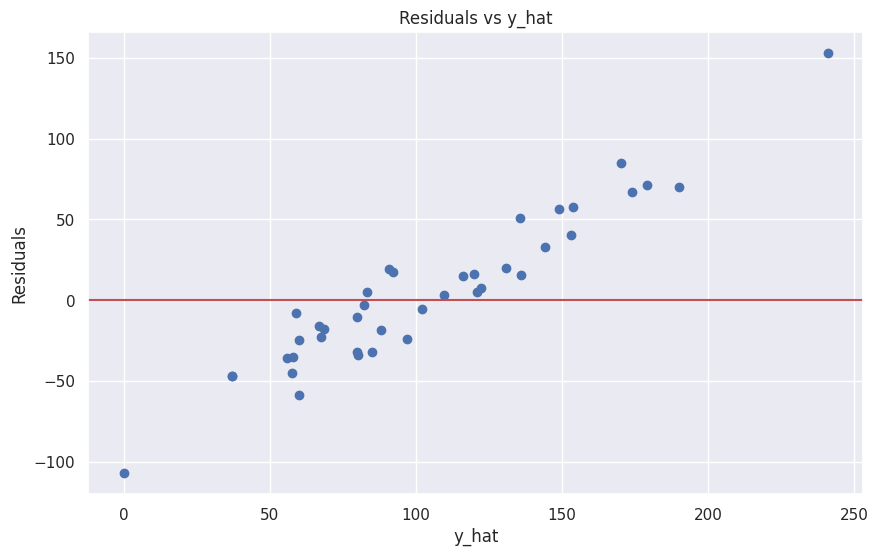

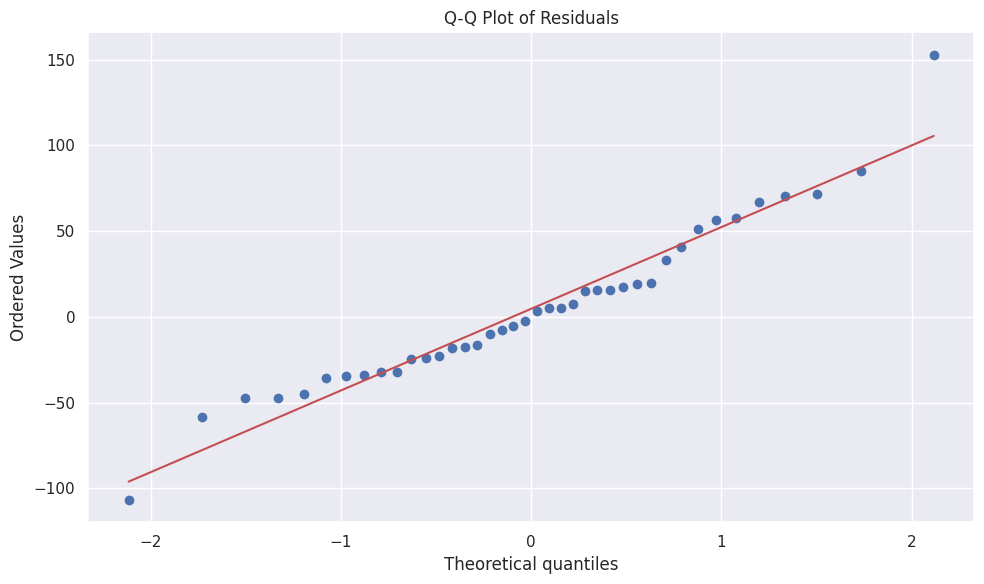

In [ ]:
# checking Linearity:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals)
plt.xlabel("y_hat")
plt.ylabel("Residuals")
plt.title("Residuals vs y_hat")
plt.axhline(y=0, color='r', linestyle='-')

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


## Section 9

Filter 200 sample points and choose 1000 points from hotel_data (5000 sample)

In [ ]:
remaining_data_indices = hotel_data.index.difference(hotel_sample_200.index)
sampled_indices = np.random.choice(remaining_data_indices, size=1000, replace=False)
hotel_sample_1000 = hotel_data.loc[sampled_indices]
hotel_sample_1000 = hotel_sample_1000[['adr', 'lead_time', 'hotel_encoded', 'arrival_date_year_encoded']]

In [ ]:
import numpy as np
from scipy import stats

def calculate_prediction_intervals(model, X, y_true, confidence=0.95):
    y_pred = model.predict(X)
    X = X.values
    n = len(y_true)
    p = X.shape[1]
    mse = np.sum((y - y_pred) ** 2) / (n - p - 1)
    h = np.diagonal(X @ np.linalg.inv(X.T @ X) @ X.T)
    t_value = stats.t.ppf((1 + confidence) / 2, n - p - 1)
    pi_width = t_value * np.sqrt(mse * (1 + h))
    lower_bound = y_pred - pi_width
    upper_bound = y_pred + pi_width
    in_interval = (y >= lower_bound) & (y <= upper_bound)
    coverage = np.mean(in_interval) * 100

    return coverage, lower_bound, upper_bound

y = hotel_sample_1000['adr'].values
X = hotel_sample_1000[X_cols]
coverage_pct, lower, upper = calculate_prediction_intervals(model, X, y)
print(f"Percentage of actual values falling within 95% prediction intervals: {coverage_pct:.1f}%")

Percentage of actual values falling within 95% prediction intervals: 93.9%


Results make sense, since we're confident with 95% and we get 93.9. Although a little lower it's not by much and we expect to get around the same percentage.

## Section 10:

Adding new variables Z

In [ ]:
Z_12 = hotel_sample_200['lead_time'] * hotel_sample_200['arrival_date_year_encoded']
Z_13 = hotel_sample_200['lead_time'] * hotel_sample_200['hotel_encoded']
Z_23 = hotel_sample_200['arrival_date_year_encoded'] * hotel_sample_200['hotel_encoded']

In [ ]:
X = pd.DataFrame({
    'lead_time': hotel_sample_200['lead_time'],
    'hotel': hotel_sample_200['hotel_encoded'],
    'year': hotel_sample_200['arrival_date_year_encoded'],
    'lead_time_x_year': Z_12,
    'lead_time_x_hotel': Z_13,
    'year_x_hotel': Z_23
})

In [ ]:
Y = hotel_sample_200['adr']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_first_order = LinearRegression()
model_first_order.fit(X_train, Y_train)

Y_pred = model_first_order.predict(X_test)
residuals = Y_test - Y_pred
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

coefficients = pd.DataFrame(model_first_order.coef_, index=X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model_first_order.intercept_:.2f}")


Model Performance:
Mean Squared Error: 2206.12
R-squared: 0.05

Model Coefficients:
                   Coefficient
lead_time              -0.0749
hotel                  -7.4101
year                    7.0722
lead_time_x_year        0.0512
lead_time_x_hotel      -0.1158
year_x_hotel            4.0394

Intercept: 97.79


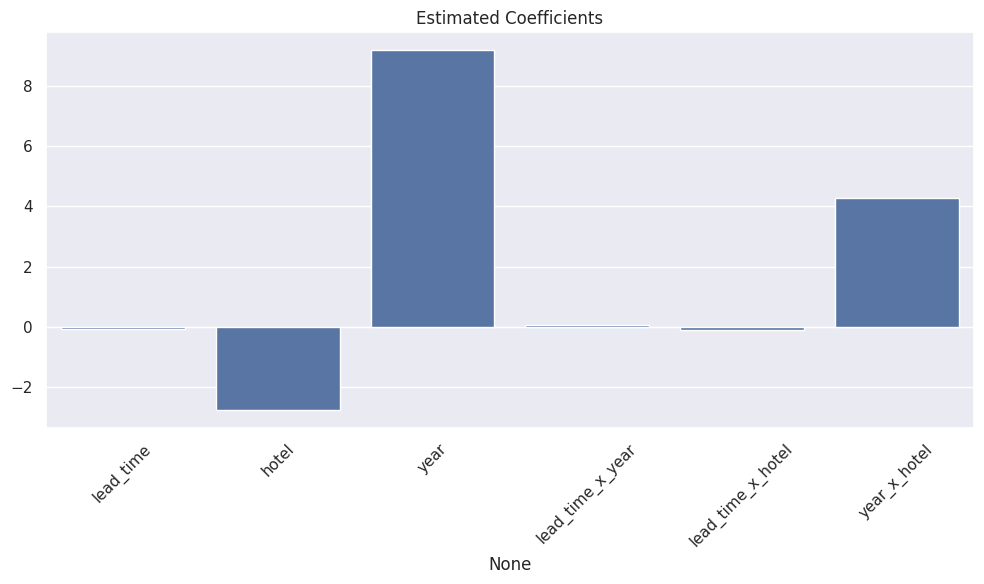


Estimated Coefficients:
lead_time: -0.0652
hotel: -2.7677
year: 9.1840
lead_time_x_year: 0.0524
lead_time_x_hotel: -0.1012
year_x_hotel: 4.2857
Intercept: 93.0522


In [ ]:
def estimate_coefficients(X, y):
    X = np.array(X)
    y = np.array(y)
    X = np.column_stack([np.ones(len(X)), X])

    # Calculate coefficients using normal equation: β = (X'X)^(-1)X'y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    return beta[0], beta[1:]

intercept, coeffs = estimate_coefficients(X, Y)
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coeffs)
plt.xticks(rotation=45)
plt.title('Estimated Coefficients')
plt.tight_layout()
plt.show()

coef_dict = dict(zip(X.columns, coeffs))
print("\nEstimated Coefficients:")
for var, coef in coef_dict.items():
    print(f"{var}: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

In [ ]:
n = len(Y_test)
k = X_train.shape[1] + 1
sse = np.sum(residuals ** 2)
sigma2 = sse / n
log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma2) + 1)

model_fo_aic = 2 * k - 2 * log_likelihood
model_fo_bic = k * np.log(n) - 2 * log_likelihood

In [ ]:
bic_model = model_bic
aic_model = model_aic

aic_model_first_order = model_fo_aic
bic_model_first_order = model_fo_aic

print(f"Model AIC: {aic_model}, BIC: {bic_model}")
print(f"Model_First_Order AIC: {aic_model_first_order}, BIC: {bic_model_first_order}")

print("\nTest one deciding which model is better with AIC scores:\n")
if aic_model < aic_model_first_order:
    print("Model has a lower AIC and is better.")
else:
    print("Model_First_Order has a lower AIC and is better.")

print("\nTest one deciding which model is better with BIC scores:\n")
if bic_model < bic_model_first_order:
    print("Model has a lower BIC and is better.")
else:
    print("Model_First_Order has a lower BIC and is better.")

Model AIC: 429.6590230325417, BIC: 436.41454084899743
Model_First_Order AIC: 435.4746456806972, BIC: 435.4746456806972

Test one deciding which model is better with AIC scores:

Model has a lower AIC and is better.

Test one deciding which model is better with BIC scores:

Model_First_Order has a lower BIC and is better.


We try two different methods, using BIC and AIC scores. The models seem to have similar stats so overall the original model is prefarable since it's less complex.

In the AIC test we get that the original model is better.

In the BIC test we get that the more complex model is better. (the first order model is more complex since it has an additional 3 variables)

# **Part B**

**SECTION 1**
Research question:

What is the influence of lead_time, hotel, and arrival_date_year on the likelihood of a booking being canceled (is_canceled)?

Explained Variable (Y):

is_canceled — Binary variable (1 = booking canceled, 0 = booking not canceled).

Explanatory Variables (X):

lead_time — Continuous variable.
hotel — binary variable.
arrival_date_year — Categorical variable.


**SECTION 2**

In [ ]:
data = pd.read_csv("hotel_bookings.csv")
sampled_data = data.sample(n=200, random_state=42)
logistic_data = sampled_data[['is_canceled', 'lead_time', 'hotel', 'arrival_date_year']]
logistic_data.head()


,is_canceled,lead_time,hotel,arrival_date_year
35752,0.0,16.0,Resort Hotel,2017.0
42768,1.0,87.0,City Hotel,2015.0
32695,0.0,1.0,Resort Hotel,2017.0
55889,1.0,10.0,City Hotel,2016.0
42562,0.0,0.0,City Hotel,2015.0


**SECTION 3**
a.

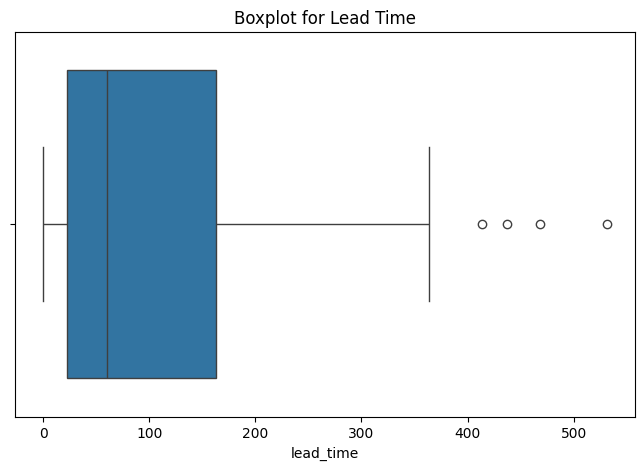

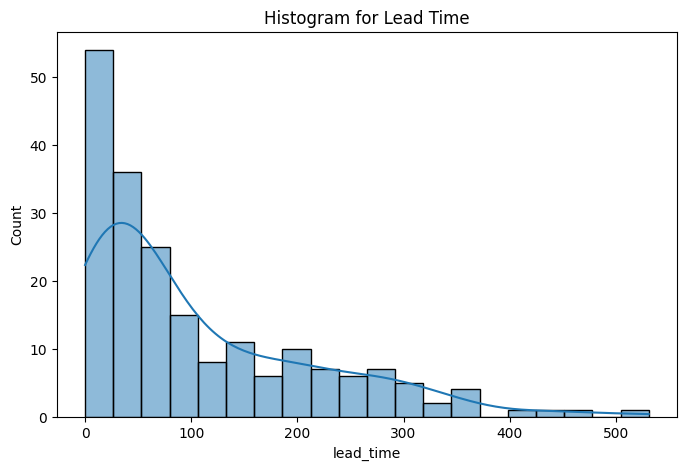

Table for Hotel (Categorical Variable):
 hotel
City Hotel      113
Resort Hotel     87
Name: count, dtype: int64

Table for Arrival Year (Categorical Variable):
 arrival_date_year
2016.0    96
2017.0    53
2015.0    51
Name: count, dtype: int64

Table for Booking Cancellation (Binary Variable):
 is_canceled
0.0    120
1.0     80
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=logistic_data, x='lead_time')
plt.title("Boxplot for Lead Time")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=logistic_data, x='lead_time', bins=20, kde=True)
plt.title("Histogram for Lead Time")
plt.show()

hotel_counts = logistic_data['hotel'].value_counts()
print("Table for Hotel (Categorical Variable):\n", hotel_counts)

year_counts = logistic_data['arrival_date_year'].value_counts()
print("\nTable for Arrival Year (Categorical Variable):\n", year_counts)

canceled_counts = logistic_data['is_canceled'].value_counts()
print("\nTable for Booking Cancellation (Binary Variable):\n", canceled_counts)


3)b.

We can see that there is no missing data for the variables that we're looking at in this section.

In [ ]:
missing_data = logistic_data.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 is_canceled          0
lead_time            0
hotel                0
arrival_date_year    0
dtype: int64


We can see that the lead_time doesn't have a symmetric distribution as it looks approximitely like a strong tailed distribution. Where there are large values to the left and values get lower as we go along the x axis.

lead_time has outliars, looking at the boxplot there are some to the right of the value 350.

Other variables are either some sort of categorical/binary variables or we discussed in Part 1 of the project.

Let's look for outliers:
Looking at `is_canceled` which is a binary variable:

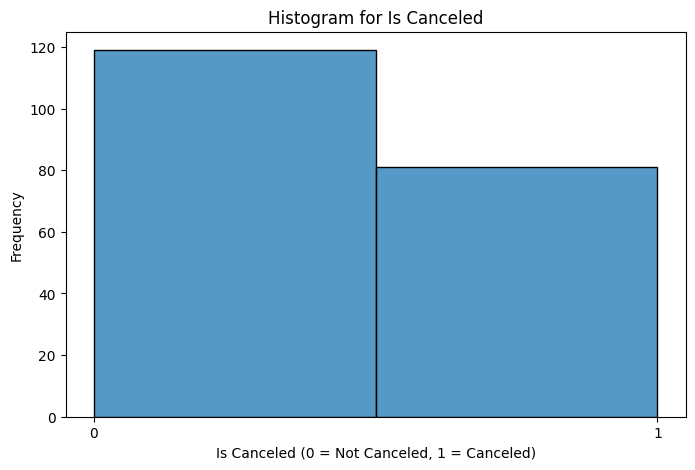

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(logistic_data['is_canceled'], bins=2, kde=False)
plt.title("Histogram for Is Canceled")
plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
plt.ylabel("Frequency")
plt.xticks([0, 1])
plt.show()


The variable is_canceled has a slight imbalance between the two classes, but is not extreme.

3)c.

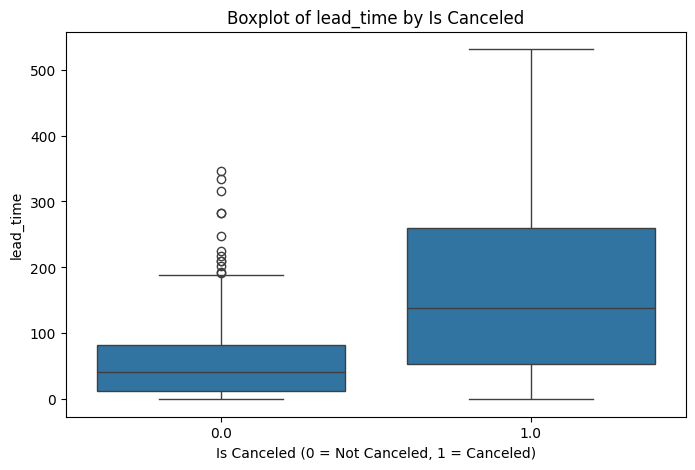

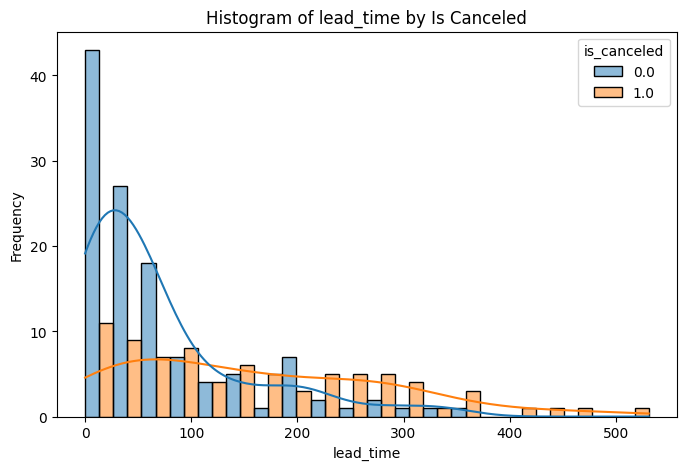

In [ ]:
continuous_vars = ['lead_time']

for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=logistic_data['is_canceled'], y=logistic_data[var])
    plt.title(f"Boxplot of {var} by Is Canceled")
    plt.xlabel("Is Canceled (0 = Not Canceled, 1 = Canceled)")
    plt.ylabel(var)
    plt.show()

for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=logistic_data, x=var, hue='is_canceled', bins=20, kde=True, multiple="dodge")
    plt.title(f"Histogram of {var} by Is Canceled")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


Since lead_time is the only continuous variable, it is the only one for which we can meaningfully visualize its relationship with Y (is_canceled) using boxplots and histograms. As a result, lead_time is indeed the variable with the most observable effect on Y in this analysis.

**SECTION 4**

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(sampled_data[['hotel', 'arrival_date_year']])
lead_time = sampled_data[['lead_time']].to_numpy()
X = np.c_[np.ones(sampled_data.shape[0]), lead_time, encoded_features]
y = sampled_data['is_canceled'].to_numpy()

model = LogisticRegression(penalty=None, fit_intercept=False).fit(X, y)
beta_estimators = model.coef_[0]

print(f"The coefficients are: {beta_estimators}")
for i in range(1, len(beta_estimators)):
    print(f"if x{i} increases by 1 unit, the effect on odds is: {np.exp(beta_estimators[i])}")


The coefficients are: [-1.19681271  0.0087648  -1.30011039 -0.08721955  1.5855753 ]
if x1 increases by 1 unit, the effect on odds is: 1.0088033189471917
if x2 increases by 1 unit, the effect on odds is: 0.2725017111416216
if x3 increases by 1 unit, the effect on odds is: 0.9164758578385005
if x4 increases by 1 unit, the effect on odds is: 4.882099249682841


The logistic regression model reveals several insights into the factors affecting the likelihood of cancellation. For the intercept (\(x_0\)), the coefficient is \(-1.1968\), which represents the baseline log-odds of a booking being canceled when all other explanatory variables are at their baseline levels. While this value is not directly interpretable in terms of odds, it sets the reference point for the other variables.

For `lead_time` (\(x_1\)), the coefficient is \(0.0088\), corresponding to an odds ratio of approximately \(1.0088\). This indicates that for every additional day in lead time, the odds of a booking being canceled increase by approximately \(0.88\%\), assuming all other variables remain constant. The effect of `lead_time` on cancellations is thus positive but very small.

The variable `hotel` (\(x_2\)), which compares Resort Hotels to the baseline category (City Hotels), has a coefficient of \(-1.3001\), resulting in an odds ratio of \(0.2725\). This suggests that staying at a Resort Hotel decreases the odds of cancellation by approximately \(72.75\%\) compared to City Hotels, holding all other factors constant. This represents a significant protective effect against cancellations for Resort Hotels.

For `arrival_date_year_2016` (\(x_3\)), the coefficient is \(-0.0872\), with an odds ratio of \(0.9165\). This indicates that bookings made in 2016 are associated with an approximately \(8.35\%\) decrease in the odds of cancellation compared to the baseline year 2015, assuming all other variables are constant. The effect is small and negative.

Finally, for `arrival_date_year_2017` (\(x_4\)), the coefficient is \(1.5856\), corresponding to an odds ratio of \(4.8821\). This indicates that bookings in 2017 are associated with a substantial increase in the odds of cancellation—by approximately \(388.21\%\)—compared to 2015, holding all other factors constant. This represents a very strong positive effect of the year 2017 on cancellations.

Overall, `lead_time` has a small positive effect on cancellation likelihood, while staying at a Resort Hotel significantly reduces the odds of cancellation. The year 2017 exhibits a very strong positive effect on cancellations, while 2016 shows a slight decrease in cancellation likelihood compared to 2015.

**SECTION 5**

In [ ]:
combined_data = pd.concat([sampled_data, data], axis=0)
X_combined = pd.get_dummies(combined_data[['lead_time', 'hotel', 'arrival_date_year']], drop_first=True)

X_sampled = X_combined.iloc[:sampled_data.shape[0], :].to_numpy()
X_all = X_combined.iloc[sampled_data.shape[0]:, :].to_numpy()
X_sampled = np.c_[np.ones(X_sampled.shape[0]), X_sampled]
X_all = np.c_[np.ones(X_all.shape[0]), X_all]

y_sampled = sampled_data['is_canceled'].to_numpy()
y_all = data['is_canceled'].to_numpy()

model_sampled = LogisticRegression(penalty=None, fit_intercept=False).fit(X_sampled, y_sampled)
model_all = LogisticRegression(penalty=None, fit_intercept=False).fit(X_all, y_all)

beta_estimators = model_sampled.coef_[0]
beta_estimator_all = model_all.coef_[0]

variables = ['Intercept'] + list(X_combined.columns)

def pi(i):
    beta_T_X_i = np.matmul(beta_estimators.T, X_sampled[i])
    return np.exp(beta_T_X_i) / (1 + np.exp(beta_T_X_i))

diagonal = [pi(i) * (1 - pi(i)) for i in range(X_sampled.shape[0])]
V = np.diag(diagonal)

X_sampled = X_sampled.astype(float)
C = np.linalg.inv(X_sampled.T @ V @ X_sampled)
norm_quantile = stats.norm.ppf(0.975)

# CI's
for i, variable in zip(range(len(beta_estimators)), variables):
    std_estimate = (C[i][i]) ** (1/2)  # std
    CI_beta_i = [beta_estimators[i] - norm_quantile * std_estimate, beta_estimators[i] + norm_quantile * std_estimate]

    contains_original = beta_estimator_all[i] >= CI_beta_i[0] and beta_estimator_all[i] <= CI_beta_i[1]

    print(f"CI for {variable} is: {CI_beta_i}")
    print(f"Does the CI of {variable} in the sampled data contain the estimator of the original data: {contains_original}")
    print()


CI for Intercept is: [-911.6859364809587, 911.6846989767581]
Does the CI of Intercept in the sampled data contain the estimator of the original data: True

CI for lead_time is: [0.005308090892078096, 0.012027861259875136]
Does the CI of lead_time in the sampled data contain the estimator of the original data: False

CI for arrival_date_year is: [-0.45275491766889875, 0.4517704688660992]
Does the CI of arrival_date_year in the sampled data contain the estimator of the original data: True

CI for hotel_Resort Hotel is: [-1.4724205683413947, -0.14846528735562114]
Does the CI of hotel_Resort Hotel in the sampled data contain the estimator of the original data: False



For the intercept, the confidence interval is extremely wide (\([-911.69, 911.68]\)), indicating high uncertainty in its estimate from the sampled data. Despite this, the interval does contain the beta coefficient from the original dataset, suggesting alignment in the intercept estimate, albeit with significant variability.
For the variable `lead_time`, the confidence interval (\([0.0053, 0.0120]\)) does not contain the beta coefficient from the original dataset, highlighting a discrepancy. This suggests that the sampled data may not adequately capture the effect of `lead_time` on the likelihood of cancellation, likely due to sampling variability or insufficient representation of the variable.

The confidence interval for `arrival_date_year` (\([-0.4528, 0.4518]\)) does contain the beta coefficient from the original dataset, indicating that the sampled data provides a reasonably good estimate of this variable. This suggests that the sampled data sufficiently represents the relationship between `arrival_date_year` and cancellation likelihood.
In contrast, the confidence interval for `hotel_Resort Hotel` (\([-1.4724, -0.1485]\)) does not contain the beta coefficient from the original dataset, indicating a potential misrepresentation of the effect of staying at a Resort Hotel compared to a City Hotel. This discrepancy could stem from an imbalance in the sampled data, such as underrepresentation of certain categories within the `hotel` variable.

**SECTION 6**

In [ ]:
x_1 = sampled_data['lead_time'].to_numpy()
x_2 = pd.get_dummies(sampled_data['hotel'], drop_first=True).to_numpy().flatten()  # Encode 'hotel' (Resort Hotel = 1)
x_3 = pd.get_dummies(sampled_data['arrival_date_year'], drop_first=True).to_numpy()[:, 0]  # Encode arrival_date_year_2016
y = sampled_data['is_canceled'].to_numpy()

X = np.c_[np.ones(x_1.shape[0]), x_1, x_2, x_3]

x_1_2 = np.multiply(x_1, x_2)  # Interaction: lead_time * hotel
x_1_3 = np.multiply(x_1, x_3)  # Interaction: lead_time * arrival_date_year
x_2_3 = np.multiply(x_2, x_3)  # Interaction: hotel * arrival_date_year

X_inter = np.c_[X, x_1_2, x_1_3, x_2_3]

model_base = LogisticRegression(penalty=None, fit_intercept=False).fit(X, y)
beta_estimators = model_base.coef_[0]

model_inter = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000).fit(X_inter, y)
beta_inter_est = model_inter.coef_[0]

print(f"With interactions model coefficients are:\n {beta_inter_est}")

def log_value(i):
    nominator = 1 + np.exp(beta_inter_est[:4] @ X[i])
    denominator = 1 + np.exp(beta_inter_est @ X_inter[i])
    return np.log(nominator / denominator)

def first_value(i):
    only_iter_product = beta_inter_est[4:] @ X_inter[i][4:]
    return y[i] * only_iter_product

# LRT statistic
statistic = 2 * sum([first_value(i) + log_value(i) for i in range(X.shape[0])])
quantile = stats.chi2.ppf(0.95, 3)
print(f"Statistic: {statistic}")
print(f"Reject H0: {statistic > quantile}")

def calc_log_likelihood_value(X, beta_estimators, y):
    sum = 0
    for i in range(X.shape[0]):
        beta_T_X_i = beta_estimators @ X[i]
        sum += y[i] * (beta_T_X_i) - np.log(1 + np.exp(beta_T_X_i))
    return sum

log_like_base = calc_log_likelihood_value(X, beta_estimators, y)
log_like_inter = calc_log_likelihood_value(X_inter, beta_inter_est, y)

AIC_base = log_like_base - (beta_estimators.shape[0] - 1)
AIC_inter = log_like_inter - (beta_inter_est.shape[0] - 1)
print(f"AIC of regular model: {AIC_base}")
print(f"AIC of model with interactions: {AIC_inter}")


With interactions model coefficients are:
 [-6.87615104e-01  1.17121532e-02 -1.29631956e+00 -5.24024536e-01
  2.59933189e-04 -5.72268216e-03  7.58391757e-01]
Statistic: 9.913824670287486
Reject H0: True
AIC of regular model: -113.31216095181293
AIC of model with interactions: -114.37587158390211


The results indicate that the interaction model provides a statistically significant improvement over the base model, as confirmed by the Likelihood Ratio Test (LRT). The LRT statistic of \(9.91\) exceeds the critical value of \(7.81\), leading to the rejection of the null hypothesis (\(H_0\)), which states that the interaction terms do not contribute to the model. Furthermore, the AIC comparison also favors the interaction model, with a slightly lower AIC score of \(-114.38\) compared to \(-113.31\) for the base model. This suggests that the interaction model achieves a better balance between model complexity and fit, albeit with a marginal improvement.

The coefficients of the interaction model reveal important insights. The interaction term between `hotel` and `arrival_date_year` has a strong positive effect (\(0.7584\)), indicating that cancellations are more likely when bookings are at Resort Hotels in 2016. The interaction between `lead_time` and `arrival_date_year` has a small negative coefficient (\(-0.00572\)), suggesting a weak decreasing effect of lead time on cancellations in 2016. Similarly, the interaction between `lead_time` and `hotel` has a very small positive coefficient (\(0.00026\)), indicating a negligible effect. These results highlight the significance of interactions in understanding cancellation behavior, particularly the combination of hotel type and booking year.

Overall, while the interaction model is statistically superior to the base model, the improvement in AIC is marginal. This suggests that the practical significance of adding interaction terms should be carefully considered, especially given the increased model complexity. Nonetheless, the findings emphasize the value of considering interactions to better capture the nuances of cancellation behavior.

**SECTION 7**

In [ ]:
sampled_data['hotel'] = pd.get_dummies(sampled_data['hotel'], drop_first=True)

def AIC_score(X, y, beta_est):
    score = 0
    for i in range(X.shape[0]):
        score += y[i] * beta_est @ X[i] - np.log(1 + np.exp(beta_est @ X[i]))
    return round(score - (beta_est.shape[0] - 1), 3)

def BIC_score(X, y, beta_est):
    score = 0
    for i in range(X.shape[0]):
        score += y[i] * beta_est @ X[i] - np.log(1 + math.exp(beta_est @ X[i]))
    return round(score - (beta_est.shape[0] - 1) * math.log(y.shape[0]) / 2, 3)

variables = ['lead_time', 'hotel', 'arrival_date_year']
all_pairs = [[a, b] for idx, a in enumerate(variables) for b in variables[idx + 1:]]
new_df = sampled_data[variables].copy()

for inter in all_pairs:
    x_1 = sampled_data[inter[0]].to_numpy()
    x_2 = sampled_data[inter[1]].to_numpy()
    x_1_2 = np.multiply(x_1, x_2)
    new_df[f"{inter[0]}::{inter[1]}"] = x_1_2

y = sampled_data['is_canceled'].to_numpy()

def select_var_forward(X, y, selected_var, left_variables, scoring_func):
    next_var = None
    next_score = -math.inf
    for var in left_variables:
        X_curr = X[selected_var + [var]].to_numpy()
        model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
        model.fit(X_curr, y)
        beta_estimators = model.coef_[0]
        curr_score = scoring_func(X_curr, y, beta_estimators)
        if curr_score > next_score:
            next_var = var
            next_score = curr_score
    if next_var is not None:
        left_variables.remove(next_var)
    return next_score, selected_var + [next_var], left_variables

def forward_stepwise(X, y, scoring_func):
    variables = set(X.columns)
    left_variables = variables.copy()
    score, selected_var = -math.inf, []
    next_score, selected_var, left_variables = select_var_forward(X, y, selected_var, left_variables, scoring_func)
    while score < next_score:
        score = next_score
        next_score, selected_var, left_variables = select_var_forward(X, y, selected_var, left_variables, scoring_func)
    return selected_var, score

def select_var_backward(X, y, selected_var, scoring_func):
    selected_variables = None
    next_score = -math.inf
    for var in selected_var:
        new_variables = selected_var.copy()
        new_variables.remove(var)
        X_curr = X[new_variables].to_numpy()
        model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
        model.fit(X_curr, y)
        beta_estimators = model.coef_[0]
        curr_score = scoring_func(X_curr, y, beta_estimators)
        if curr_score > next_score:
            selected_variables = new_variables
            next_score = curr_score
    return next_score, selected_variables

def backward_stepwise(X, y, scoring_func):
    variables = set(X.columns)
    model = LogisticRegression(penalty=None, fit_intercept=False, max_iter=1000)
    model.fit(X.to_numpy(), y)
    beta_estimators = model.coef_[0]
    selected_var = list(variables.copy())
    score = scoring_func(X.to_numpy(), y, beta_estimators)
    next_score, selected_var = select_var_backward(X, y, selected_var, scoring_func)
    while score < next_score:
        score = next_score
        next_score, selected_var = select_var_backward(X, y, selected_var, scoring_func)
    return selected_var, score

for method in [forward_stepwise, backward_stepwise]:
    selected_variables, score = method(new_df, y, AIC_score)
    print(f"Selected variables using {method.__name__}: {list(selected_variables)}, AIC score: {score}")


Selected variables using forward_stepwise: ['hotel', 'lead_time::arrival_date_year', 'arrival_date_year', 'lead_time', 'lead_time::hotel'], score: -114.471
Selected variables using backward_stepwise: ['arrival_date_year', 'hotel', 'lead_time::arrival_date_year'], score: -114.471


The results of the stepwise regression analysis show that both the forward and backward stepwise methods identified models with the same AIC score of \(-114.471\), indicating comparable predictive performance. However, the selected variables differ between the two methods. The forward stepwise method, which started with no variables and iteratively added those that improved the AIC score, selected a more comprehensive model that includes `hotel`, `lead_time`, `arrival_date_year`, and two interaction terms: `lead_time::arrival_date_year` and `lead_time::hotel`. On the other hand, the backward stepwise method, which began with all variables and iteratively removed the least significant ones, produced a simpler model with only three variables: `hotel`, `arrival_date_year`, and the interaction term `lead_time::arrival_date_year`.

While both models achieve the same score, they differ in complexity and interpretability. The backward stepwise method results in a simpler and more interpretable model, which might be preferred when clarity is a priority. In contrast, the forward stepwise method captures additional interaction effects, providing a more nuanced understanding of the relationships among variables, though at the cost of increased complexity. The inclusion of interaction terms in both models, particularly `lead_time::arrival_date_year`, highlights the importance of considering combined effects when analyzing cancellation behavior. Ultimately, the choice between the two models depends on the specific goals of the analysis—whether simplicity and interpretability are prioritized or a more detailed representation of the relationships is desired.

**SECTION 8**

In [ ]:
def BIC_score(X, y, beta_est):
    score = 0
    for i in range(X.shape[0]):
        score += y[i] * beta_est @ X[i] - np.log(1 + np.exp(beta_est @ X[i]))
    return round(score - (beta_est.shape[0] - 1) * np.log(y.shape[0]) / 2, 3)

for method in [forward_stepwise, backward_stepwise]:
    selected_variables, score = method(new_df, y, BIC_score)
    print(f"Selected variables using {method.__name__}: {list(selected_variables)}, BIC score: {score}")


Selected variables using forward_stepwise: ['hotel', 'lead_time::arrival_date_year', 'arrival_date_year', 'lead_time'], score: -118.593
Selected variables using backward_stepwise: ['arrival_date_year', 'lead_time::arrival_date_year'], score: -118.593


The results of the stepwise regression using the **BIC score** show that both the forward and backward stepwise methods identified models with the same **BIC score of -118.593**, indicating that their performance in terms of the balance between model complexity and fit is comparable. However, the specific variables selected differ between the two methods.

The **forward stepwise method** selected a more comprehensive model that includes the variables `hotel`, `lead_time`, `arrival_date_year`, and the interaction term `lead_time::arrival_date_year`. This model considers both main effects and an interaction, potentially capturing more nuanced relationships in the data. In contrast, the **backward stepwise method** produced a simpler model, retaining only `arrival_date_year` and the interaction term `lead_time::arrival_date_year`. This suggests that the backward method found these two variables sufficient to explain the data while minimizing complexity.

**Has the Decision About the Best Model Changed?**

The decision about the best model has shifted slightly. With AIC, the forward method's model was considered more informative due to its additional variables and interactions. However, with BIC's stronger penalty for complexity, the backward method's simpler model might now be preferred for its interpretability and parsimony, as it achieves the same BIC score with fewer variables.

The difference in selected variables is due to the nature of the scoring metrics. AIC favors models with better fit, even if they are more complex, while BIC prioritizes simplicity and penalizes complexity more heavily. This explains why the backward method's simpler model performs equally well under BIC, while the forward method includes additional variables that provide only marginal improvements in fit.

Ultimately, the choice of the best model depends on the goals of the analysis. If simplicity and interpretability are prioritized, the backward stepwise model should be chosen. If capturing additional nuances and relationships is more important, the forward stepwise model offers greater complexity and detail. Both models, however, provide comparable predictive performance based on their BIC scores.